# Mathematisches Pendel
 
[P. Kersten](https://www.hshl.de/personen/prof-dr-ing-peter-kersten), [J. Jeschonowski](https://www.xing.com/profile/Jule_Jeschonowski/cv), [L.P. Kamegne-Kamdem](https://www.linkedin.com/in/leger-paco-kamegne-kamdem-07ba39184/), [N.B. Neathery](https://www.linkedin.com/in/noel-neathery-6371561a6/) und D.M. Weis

[Hochschule Hamm-Lippstadt](https://www.hshl.de), Marker Allee 76–78, D-59063 Hamm


## Inhalt
- Experimentelle Bestimmung der Schwingungsdauer $T$
- Mit der Dimensionsanalyse und dem Experiment eine Formel für die Schwingungsdauer $T$ entwickeln
- Den Wert für die Erdbeschleunigung $g$ experimentell ermitteln

In [6]:
%matplotlib inline
import numpy as np
import sympy as sp
import math as m
import matplotlib.pyplot as plt
import ipywidgets as widgets
import scipy.optimize

from ipywidgets import interact
from sympy import symbols
from sympy.plotting import plot3d
from matplotlib.pyplot import figure

from scipy.optimize import curve_fit

In [7]:

#____import____

%matplotlib inline

import numpy as np
import ipywidgets as widgets

from ipywidgets import interact
from IPython.display import Markdown, clear_output, display, HTML

javascript_functions = {False: "hide()", True: "show()"}
button_descriptions  = {False: "Code anzeigen", True: "Code verbergen"}


def toggle_code(state):

    """
    Toggles the JavaScript show()/hide() function on the div.input element.
    """

    output_string = "<script>$(\"div.input\").{}</script>"
    output_args   = (javascript_functions[state],)
    output        = output_string.format(*output_args)

    display(HTML(output))


def button_action(value):

    """
    Calls the toggle_code function and updates the button description.
    """

    state = value.new

    toggle_code(state)

    value.owner.description = button_descriptions[state]


state = False
toggle_code(state)

button = widgets.ToggleButton(state, description = button_descriptions[state])
button.observe(button_action, "value")

display(button)

ToggleButton(value=False, description='Code anzeigen')

## Experimentelle Bestimmung der Schwingungsdauer $T$

Wir wollen die Schwingungsdauer $T$ eines mathematischen Pendels experimentell ermitteln. Gemäß der durchgeführten Dimensionsanalyse erwarten wir folgenden Zusammenhang:


$T\sim \sqrt{\frac{l}{g}}$

Hierbei sind $l$ die Fadenlänge und $g$ die Erdbeschleunigung. Diesen Zusammenhang wollen wir experimentell mit einfachen Mitteln (ein kleines Gewicht, ein Zwirnsfaden, ein Maßband und eine Stoppuhr reichen aus) folgendermaßen überprüfen:

- Wir messen die Schwingungsdauer $T$ für die Fadenlängen 0,50 m, 0,75 m, 1,00 m, 1,25 m und 1,5 m.

- Um eine höhere Genauigkeit bei der Zeitmessung zu erzielen, messen wir 10 volle Schwingungen (also jeweil hin- und zurück).

- Schreiben Sie die Meßwerte für die Fadenlänge (in der Einheit m) in den Vektor (variable `l`). 

- Schreiben Sie die Meßwerte für die Schwingungsdauer $T_{10}$ (in der Einheit s) in den Vektor (variable `T10`).

In [8]:
l = np.array([0.5, 0.75, 1.0, 1.25, 1.5]) # Messwerte der Fadenlänge
T10 = np.array([13.8, 17.0, 19.6, 21.6, 22.0]) # Messwerte der Schwingunszeiten für 10 volle Schwingungen

T = T10/10

Nun können wir die Meßwerte grafisch darstellen.

Text(0.5, 1.0, 'Das mathematische Pendel')

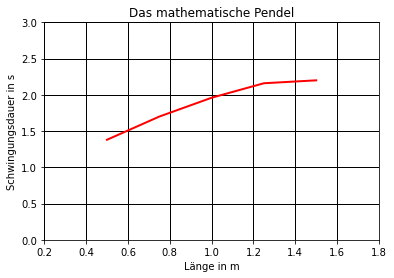

In [9]:
plt.plot(l,T,'r',lw=2)
plt.grid(color='k', linestyle='-', linewidth=1)
plt.ylim(0, 3)
plt.xlim(0.2, 1.8)
plt.xlabel('Länge in m')
plt.ylabel('Schwingungsdauer in s')
plt.title('Das mathematische Pendel')


## Mit der Dimensionsanalyse und dem Experiment eine Formel für die Schwingungsdauer $T$ entwickeln

Wenn der vermutete Zusammenhang $T\sim \sqrt{\frac{l}{g}}$ richtig ist, erwarten wir eine Funktionsverlauf der Form $T= \alpha \cdot l^{\beta}$.

Die Parameter $\alpha$ und $\beta$ können wir mit Hilfe einer Regressionsanalyse bestimmen.

In [10]:
def fit(x,a,b):
    return a * x**b

params, covariance = curve_fit(f = fit, xdata = l, ydata = T)

print('alpha:', params[0])
print('beta', params[1])

alpha: 1.9121234346738467
beta 0.4253363181803931


## Den Wert für die Erdbeschleunigung $g$ experimentell ermitteln

In Lehrbüchern finden wir folgende Formel für die Schwingungsdauer $T$ eines mathematischen Pendels:

$T = 2 \pi \sqrt{\frac{l}{g}}$

Diese Formel ermöglicht uns, die Erdbeschleunigung $g$ mit Hilfe einer Regressionsanalyse aus unseren Messwerten zu ermitteln.

Hierzu formen wir den Ausdruck für $T$ folgendermaßen um:   
$T = 2 \pi \cdot ({\frac{1}{g}})^{0,5} \cdot (l)^{0,5}$

Mit der Regression wird nun berechent, welcher optimaler Wert für $g$ resultiert, wenn sich die Meßwerte optimal an die exakte Formel anpassen sollen.

In [11]:
def fit1(x,g):
    return 2*m.pi*x**0.5 * (1/g)**0.5

params, covariance = curve_fit(f = fit1, xdata = l, ydata = T)
print('g:', params[0])

g: 10.895802090267464


## Danksagung


Dieses digitale Lehr-/Lernmaterial wurde im Rahmen des Programms [Fellowships für Innovationen in der digitalen Hochschullehre](https://www.stifterverband.org/digital-lehrfellows-nrw/2019/temmen_kersten) des Ministeriums für Kultur und Wissenschaft des Landes Nordrhein-Westfalen und des Stifterverbandes entwickelt. 

Die Autoren stellen dieses digitale Lehr-/Lernmateriales als Open Educational Ressources unter der Lizenz [Creative Commons Attribution-ShareAlike 4.0 International License (CC BY-SA 4.0)](https://creativecommons.org/licenses/by-sa/4.0/) zur Verfügung.


    
<img align="left" src="https://licensebuttons.net/l/by-sa/3.0/88x31.png">